# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
import util
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-e5abb615-ed66-528f-496a-6bcaf0ff5870)
GPU 1: NVIDIA H200 (UUID: GPU-87885897-6ac5-d983-e0e1-e2ed6d754adc)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [18]:
folder_path = os.path.join(os.getenv("HOME"), "scratch")
test_dataset = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False)
# test_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False)
test_dataset.check()

There are 0 missing values
3998 images with label 0, and 3997 with label 1.
All filenames end with .jpg


## (Optional) Show images

Label: 0, shape: torch.Size([3, 512, 768])


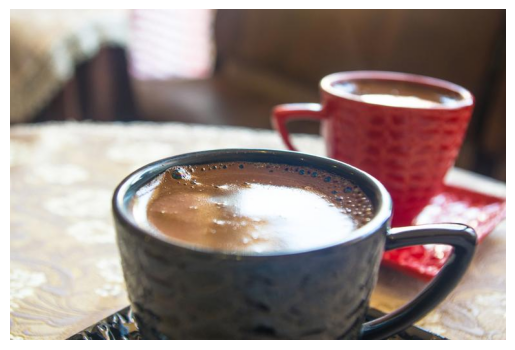

Label: 1, shape: torch.Size([3, 512, 768])


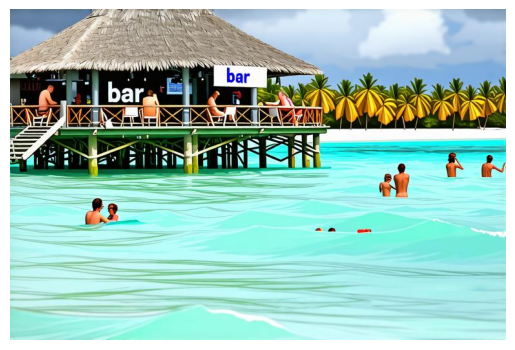

In [19]:
test_dataset.show_image(transform=False)

## (Optional) Show images after transformation

Label: 0, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3715544..1.7059107].


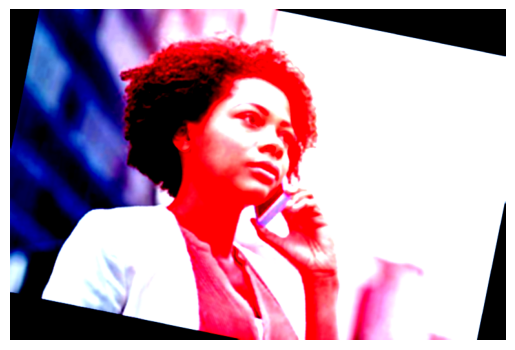

Label: 1, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3866258..1.7200577].


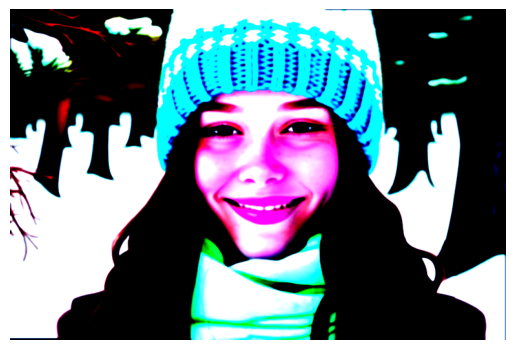

In [11]:
dataset.show_image(transform=True)

# CNN Model

## Create Torch Data Loaders

In [20]:
test_loader = test_dataset.get_loader()

## Check CUDA Availability

In [21]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Testing the Model

## Load the model

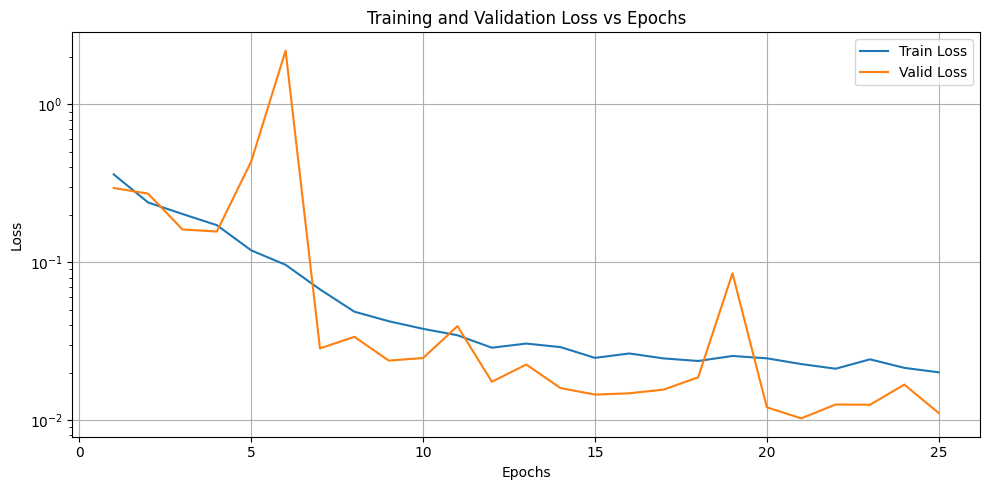

In [22]:
model, train_losses, valid_losses = load_model("CNN3_best.ckpt", "CNN3_loss.pkl")
plot_losses(train_losses, valid_losses)

## Evaluation

100%|██████████| 250/250 [00:42<00:00,  5.85it/s]


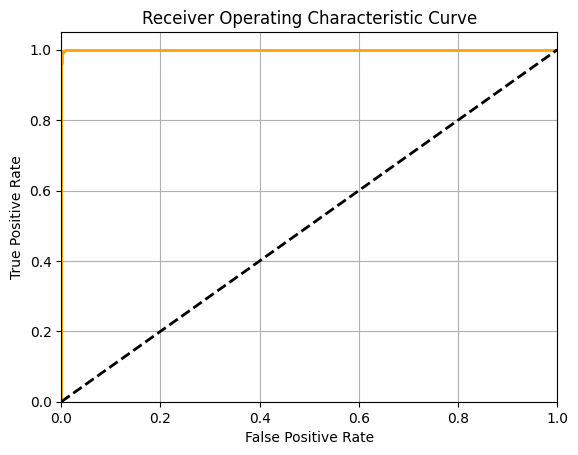

Test Accuracy: 0.9961
F1 Score: 0.9961
F2 Score: 0.9961
AUC: 0.9998


(0.9961225766103815,
 0.9961225722428181,
 0.9961222719125229,
 np.float64(0.9998150814211209))

In [23]:
evaluate_model(model, test_loader)